In [1]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists
 927443.png
 cfg
 Classroom
'Colab Notebooks'
'Compose Camp Meeting Attendance (1).gsheet'
'Compose Camp Meeting Attendance.gsheet'
 CV_2022102509504720.pdf
 CV_2023042210304557.pdf
 DOCUMENTS
 Every
'Excel Project'
 IndabaX2023
'My Drive'
'ptffdozmjv 10_8_2022 10_55_40 AM.csv'
 Snapchat-1672382557.jpg
 Snapchat-1858707754.jpg
'yok-iuoe-qxe - Sep 23, 2022 (1).gjam'
'yok-iuoe-qxe - Sep 23, 2022.gjam'


In [4]:
%cd content/gdrive/MyDrive/IndabaX2023/

/content/gdrive/MyDrive/IndabaX2023


In [5]:
#importing training datasets
client_trainset = pd.read_csv("train/client_train.csv")
invoice_trainset = pd.read_csv("train/invoice_train.csv")

In [6]:
#importing test datasets
client_testset = pd.read_csv("test/client_test.csv")
invoice_testset = pd.read_csv("test/invoice_test.csv")

In [7]:
client_trainset.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [8]:
invoice_trainset.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [9]:
client_testset.head()

,disrict,client_id,client_catg,region,creation_date
0,62,test_Client_0,11,307,28/05/2002
1,69,test_Client_1,11,103,06/08/2009
2,62,test_Client_10,11,310,07/04/2004
3,60,test_Client_100,11,101,08/10/1992
4,62,test_Client_1000,11,301,21/07/1977


In [10]:
invoice_testset.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC


In [11]:
print(client_trainset.shape)
print(invoice_trainset.shape)
print(client_testset.shape)
print(invoice_testset.shape)

(135493, 6)
(4476749, 16)
(58069, 5)
(1939730, 16)


In [12]:
client_trainset.nunique()

disrict               4
client_id        135493
client_catg           3
region               25
creation_date      8088
target                2
dtype: int64

In [13]:
client_trainset["client_id"].unique()

array(['train_Client_0', 'train_Client_1', 'train_Client_10', ...,
       'train_Client_99997', 'train_Client_99998', 'train_Client_99999'],
      dtype=object)

In [14]:
invoice_trainset.nunique()

client_id               135493
invoice_date              8275
tarif_type                  17
counter_number          201893
counter_statue              16
counter_code                42
reading_remarque             8
counter_coefficient         16
consommation_level_1      8295
consommation_level_2     12576
consommation_level_3      2253
consommation_level_4     12075
old_index               155648
new_index               157980
months_number             1370
counter_type                 2
dtype: int64

In [15]:
train_df = invoice_trainset.merge(client_trainset, how = 'inner', on = 'client_id')
train_df.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,...,consommation_level_4,old_index,new_index,months_number,counter_type,disrict,client_catg,region,creation_date,target
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,...,0,14302,14384,4,ELEC,60,11,101,31/12/1994,0.0
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,...,0,12294,13678,4,ELEC,60,11,101,31/12/1994,0.0
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,...,0,14624,14747,4,ELEC,60,11,101,31/12/1994,0.0
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,...,0,14747,14849,4,ELEC,60,11,101,31/12/1994,0.0
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,...,0,15066,15638,12,ELEC,60,11,101,31/12/1994,0.0


In [16]:
test_df = invoice_testset.merge(client_testset, how = 'inner', on = 'client_id')
test_df.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,disrict,client_catg,region,creation_date
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC,62,11,307,28/05/2002
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC,62,11,307,28/05/2002
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC,62,11,307,28/05/2002
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC,62,11,307,28/05/2002
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC,62,11,307,28/05/2002


In [17]:
print(train_df.shape)
print(test_df.shape)

(4476749, 21)
(1939730, 20)


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4476749 entries, 0 to 4476748
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   client_id             object 
 1   invoice_date          object 
 2   tarif_type            int64  
 3   counter_number        int64  
 4   counter_statue        object 
 5   counter_code          int64  
 6   reading_remarque      int64  
 7   counter_coefficient   int64  
 8   consommation_level_1  int64  
 9   consommation_level_2  int64  
 10  consommation_level_3  int64  
 11  consommation_level_4  int64  
 12  old_index             int64  
 13  new_index             int64  
 14  months_number         int64  
 15  counter_type          object 
 16  disrict               int64  
 17  client_catg           int64  
 18  region                int64  
 19  creation_date         object 
 20  target                float64
dtypes: float64(1), int64(15), object(5)
memory usage: 751.4+ MB


In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1939730 entries, 0 to 1939729
Data columns (total 20 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        int64 
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
 16  disrict               int64 
 17  client_catg           int64 
 18  region                int64 
 19  creation_date         object
dtypes: int64(16), object(4)
memory usage: 310.8+ MB


In [20]:
train_df.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,disrict,client_catg,region,target
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01,6.348246e+01,1.194381e+01,2.103584e+02,7.887688e-02
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03,3.273403e+00,6.022452e+00,1.035828e+02,2.695465e-01
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+01,1.100000e+01,1.010000e+02,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00,6.200000e+01,1.100000e+01,1.030000e+02,0.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00,6.200000e+01,1.100000e+01,3.010000e+02,0.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00,6.300000e+01,1.100000e+01,3.090000e+02,0.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05,6.900000e+01,5.100000e+01,3.990000e+02,1.000000e+00


In [21]:
elect_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
print(elect_df.shape)
elect_df.head()

(6416479, 21)


,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,...,consommation_level_4,old_index,new_index,months_number,counter_type,disrict,client_catg,region,creation_date,target
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,...,0,14302,14384,4,ELEC,60,11,101,31/12/1994,0.0
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,...,0,12294,13678,4,ELEC,60,11,101,31/12/1994,0.0
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,...,0,14624,14747,4,ELEC,60,11,101,31/12/1994,0.0
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,...,0,14747,14849,4,ELEC,60,11,101,31/12/1994,0.0
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,...,0,15066,15638,12,ELEC,60,11,101,31/12/1994,0.0


Text(0.5, 1.0, 'Correlations Between Variables')

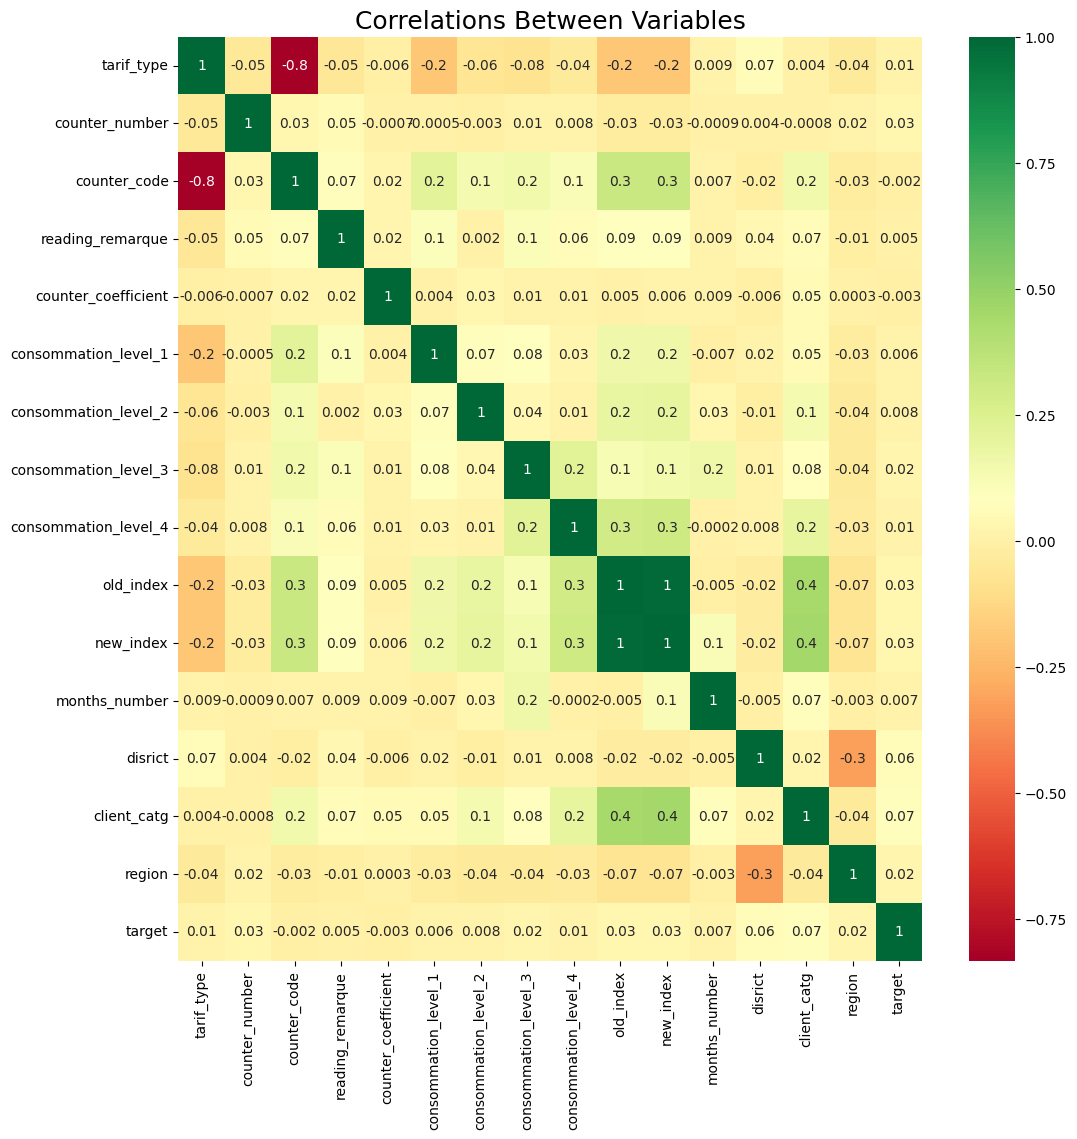

In [22]:
plt.figure(figsize=(12,12)) #correlations between the features
sns.heatmap(elect_df.corr(), cmap="RdYlGn", fmt=".1g", annot=True)
plt.title("Correlations Between Variables", size=18)

In [23]:
important_features = list(elect_df.corr()["target"][(elect_df.corr()["target"]>0.01) | (elect_df.corr()["target"]<-0.01)].index)
print(important_features)

['tarif_type', 'counter_number', 'consommation_level_3', 'consommation_level_4', 'old_index', 'new_index', 'disrict', 'client_catg', 'region', 'target']


In [24]:
categorical_features= ["client_id","counter_statue","counter_type"]

In [25]:
main_df = important_features + categorical_features
print(main_df)

['tarif_type', 'counter_number', 'consommation_level_3', 'consommation_level_4', 'old_index', 'new_index', 'disrict', 'client_catg', 'region', 'target', 'client_id', 'counter_statue', 'counter_type']


In [26]:
main_dataset = elect_df[main_df]
print(main_dataset.shape)
main_dataset.head()

(6416479, 13)


,tarif_type,counter_number,consommation_level_3,consommation_level_4,old_index,new_index,disrict,client_catg,region,target,client_id,counter_statue,counter_type
0,11,1335667,0,0,14302,14384,60,11,101,0.0,train_Client_0,0,ELEC
1,11,1335667,0,0,12294,13678,60,11,101,0.0,train_Client_0,0,ELEC
2,11,1335667,0,0,14624,14747,60,11,101,0.0,train_Client_0,0,ELEC
3,11,1335667,0,0,14747,14849,60,11,101,0.0,train_Client_0,0,ELEC
4,11,1335667,0,0,15066,15638,60,11,101,0.0,train_Client_0,0,ELEC


In [27]:
main_dataset["counter_statue"].unique()

array([0, 1, 5, 4, 3, 2, 769, '0', '5', '1', '4', 'A', 618, 269375, 46,
       420], dtype=object)

In [28]:
clean_list = []
for i in main_dataset["counter_statue"]:
  char = str(i)[0]
  if char == "A":
    char = 1
  elif float(char) > 4:
    char = 4
   
  char = float(char)
  clean_list.append(char)
print(clean_list[3000:3100])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [29]:
main_dataset["counter_statue"] = clean_list
main_dataset["counter_statue"].unique()

array([0., 1., 4., 3., 2.])

In [30]:
main_dataset.head()

,tarif_type,counter_number,consommation_level_3,consommation_level_4,old_index,new_index,disrict,client_catg,region,target,client_id,counter_statue,counter_type
0,11,1335667,0,0,14302,14384,60,11,101,0.0,train_Client_0,0.0,ELEC
1,11,1335667,0,0,12294,13678,60,11,101,0.0,train_Client_0,0.0,ELEC
2,11,1335667,0,0,14624,14747,60,11,101,0.0,train_Client_0,0.0,ELEC
3,11,1335667,0,0,14747,14849,60,11,101,0.0,train_Client_0,0.0,ELEC
4,11,1335667,0,0,15066,15638,60,11,101,0.0,train_Client_0,0.0,ELEC


In [31]:
main_dataset["counter_type"].unique()

array(['ELEC', 'GAZ'], dtype=object)

In [32]:
main_dataset_dummy = pd.get_dummies(main_dataset.drop("client_id", axis=1), drop_first=True).drop(columns="counter_statue")
main_dataset_dummy.head()

,tarif_type,counter_number,consommation_level_3,consommation_level_4,old_index,new_index,disrict,client_catg,region,target,counter_type_GAZ
0,11,1335667,0,0,14302,14384,60,11,101,0.0,0
1,11,1335667,0,0,12294,13678,60,11,101,0.0,0
2,11,1335667,0,0,14624,14747,60,11,101,0.0,0
3,11,1335667,0,0,14747,14849,60,11,101,0.0,0
4,11,1335667,0,0,15066,15638,60,11,101,0.0,0


In [33]:
main_dataset_dummy = pd.concat([main_dataset["client_id"],main_dataset_dummy], axis = 1)
main_dataset_dummy.head()

,client_id,tarif_type,counter_number,consommation_level_3,consommation_level_4,old_index,new_index,disrict,client_catg,region,target,counter_type_GAZ
0,train_Client_0,11,1335667,0,0,14302,14384,60,11,101,0.0,0
1,train_Client_0,11,1335667,0,0,12294,13678,60,11,101,0.0,0
2,train_Client_0,11,1335667,0,0,14624,14747,60,11,101,0.0,0
3,train_Client_0,11,1335667,0,0,14747,14849,60,11,101,0.0,0
4,train_Client_0,11,1335667,0,0,15066,15638,60,11,101,0.0,0


In [34]:
new_trainset = main_dataset_dummy[main_dataset_dummy["target"].isnull()==False]
print(new_trainset.shape)
new_trainset.head()

(4476749, 12)


,client_id,tarif_type,counter_number,consommation_level_3,consommation_level_4,old_index,new_index,disrict,client_catg,region,target,counter_type_GAZ
0,train_Client_0,11,1335667,0,0,14302,14384,60,11,101,0.0,0
1,train_Client_0,11,1335667,0,0,12294,13678,60,11,101,0.0,0
2,train_Client_0,11,1335667,0,0,14624,14747,60,11,101,0.0,0
3,train_Client_0,11,1335667,0,0,14747,14849,60,11,101,0.0,0
4,train_Client_0,11,1335667,0,0,15066,15638,60,11,101,0.0,0


In [35]:
new_testset = main_dataset_dummy[main_dataset_dummy["target"].isnull()==True]
new_testset = new_testset.drop("target", axis=1)
print(new_testset.shape)
new_testset.head()

(1939730, 11)


,client_id,tarif_type,counter_number,consommation_level_3,consommation_level_4,old_index,new_index,disrict,client_catg,region,counter_type_GAZ
4476749,test_Client_0,11,651208,0,0,19145,19900,62,11,307,0
4476750,test_Client_0,11,651208,0,0,13725,14792,62,11,307,0
4476751,test_Client_0,11,651208,0,0,14792,14792,62,11,307,0
4476752,test_Client_0,11,651208,0,0,16122,16532,62,11,307,0
4476753,test_Client_0,11,651208,0,0,17471,17883,62,11,307,0


In [36]:
X = new_trainset.drop(["client_id","target"], axis=1)
X.shape

(4476749, 10)

In [37]:
y = new_trainset["target"]
y.shape

(4476749,)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(y_train.shape)  
print(X_test.shape) 
print(y_test.shape)

(3581399, 10)
(3581399,)
(895350, 10)
(895350,)


In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [40]:
logr = LogisticRegression()
logr.fit(X_train, y_train)
logr.score(X_train, y_train)

0.9211140674356585

In [42]:
y_predlog = logr.predict(X_test)

In [43]:
print(classification_report(y_test, y_predlog))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    824728
         1.0       0.43      0.00      0.00     70622

    accuracy                           0.92    895350
   macro avg       0.68      0.50      0.48    895350
weighted avg       0.88      0.92      0.88    895350



In [44]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

0.9959024392423185

In [45]:
y_preddt = dt.predict(X_test)

In [46]:
print(classification_report(y_test, y_preddt))

              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90    824728
         1.0       0.10      0.16      0.13     70622

    accuracy                           0.82    895350
   macro avg       0.51      0.52      0.51    895350
weighted avg       0.86      0.82      0.84    895350



In [47]:
ranfor = RandomForestClassifier()
ranfor.fit(X_train, y_train)
ranfor.score(X_train, y_train)

0.938084809874577

In [48]:
y_predrf = ranfor.predict(X_test)

In [49]:
print(classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    824728
         1.0       0.43      0.03      0.06     70622

    accuracy                           0.92    895350
   macro avg       0.68      0.51      0.51    895350
weighted avg       0.88      0.92      0.89    895350



In [ ]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
xgb.score(X_train, y_train)

In [ ]:
y_predxgb = xgb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predxgb))

In [54]:
new_testset = new_testset.reset_index(drop=True)
new_testset.head()

,client_id,tarif_type,counter_number,consommation_level_3,consommation_level_4,old_index,new_index,disrict,client_catg,region,counter_type_GAZ
0,test_Client_0,11,651208,0,0,19145,19900,62,11,307,0
1,test_Client_0,11,651208,0,0,13725,14792,62,11,307,0
2,test_Client_0,11,651208,0,0,14792,14792,62,11,307,0
3,test_Client_0,11,651208,0,0,16122,16532,62,11,307,0
4,test_Client_0,11,651208,0,0,17471,17883,62,11,307,0


In [79]:
prediction = xgb.predict_proba(new_testset.drop("client_id", axis=1))[:,1]

In [75]:
id = new_testset["client_id"]

In [76]:
submission = pd.DataFrame({"client_id": id, "target": prediction})
submission.head(10)

,client_id,target
0,test_Client_0,0.080727
1,test_Client_0,0.078759
2,test_Client_0,0.075772
3,test_Client_0,0.080648
4,test_Client_0,0.080727
5,test_Client_0,0.088318
6,test_Client_0,0.081328
7,test_Client_0,0.082195
8,test_Client_0,0.090402
9,test_Client_0,0.090706


In [77]:
submission = submission.groupby("client_id")["target"].max().reset_index()
submission.head()

,client_id,target
0,test_Client_0,0.091872
1,test_Client_1,0.217730
2,test_Client_10,0.105285
3,test_Client_100,0.044285
4,test_Client_1000,0.097286


In [78]:
submission.to_csv("submissionxgb6.csv", index=False)